# OpenCV image morphology

In this notebook we apply dilation, erosion and edge detection to images.

## Imports
Includes our own libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image

## Constructing a binary image

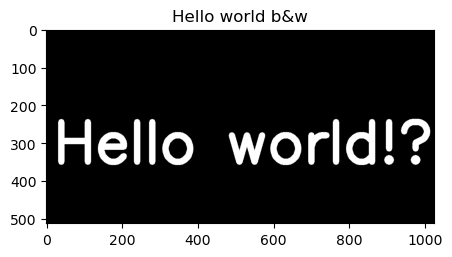

In [3]:
image = np.zeros((512,1024,3), np.uint8)

text = 'Hello world!?'
cv2.putText(image, text, (20,350), cv2.FONT_ITALIC, 5, (255,255,255), 15)

show_image(image, "Hello world b&w", 10)

## Dilation, Erosion, Opening and Closing
* **Dilation**: Adds pixels to the boundaries
* **Erosion**: Removes pixels from the boundaries
* **Opening**: Erosion followed by dilation -> removes noise
* **Closing**: Dilation followed by erosion -> removes noise

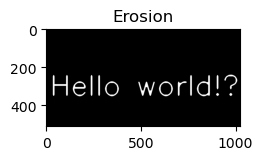

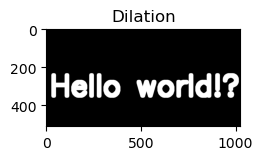

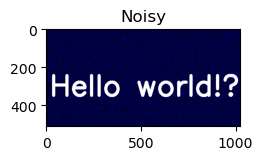

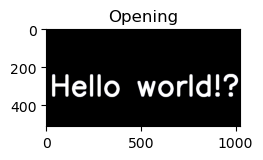

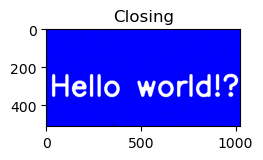

In [4]:
kernel = np.ones((9,9), np.uint8)

# erosion
erosion = cv2.erode(image, kernel, iterations = 1)
show_image(erosion, 'Erosion')

# dilation
dilation = cv2.dilate(image, kernel, iterations = 1)
show_image(dilation, 'Dilation')

# add some gaussian noise
mean = 0
stddev = 180
noise = np.zeros(image.shape, np.uint8)
cv2.randn(noise, mean, stddev)
noisy_img = cv2.add(image, noise)
show_image(noisy_img, 'Noisy')

# opening
opening = cv2.morphologyEx(noisy_img, cv2.MORPH_OPEN, kernel)
show_image(opening, 'Opening')

# closing
closing = cv2.morphologyEx(noisy_img, cv2.MORPH_CLOSE, kernel)
show_image(closing, 'Closing')

## Edge detection
We can use [canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector) provided by  
`cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) `

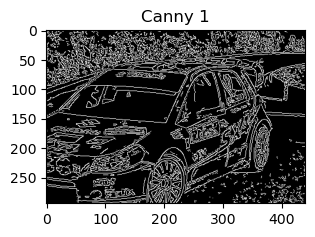

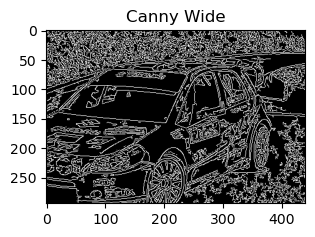

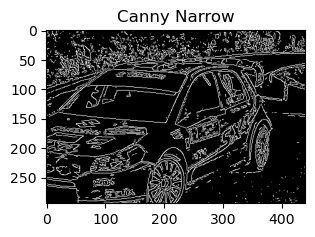

In [5]:
image = cv2.imread('tmp/wiki/04/11720204_1980-03-10_2008.jpg')

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 120, 200)
show_image(canny, 'Canny 1')

# Wide edge thresholds expect lots of edges
wide = cv2.Canny(image, 10, 200)
show_image(wide, 'Canny Wide')

# Narrow threshold, expect less edges 
narrow = cv2.Canny(image, 200, 240)
show_image(narrow, 'Canny Narrow')

We can also use the median intensity to find some reasonable thresholds. We can use our helper function for this.

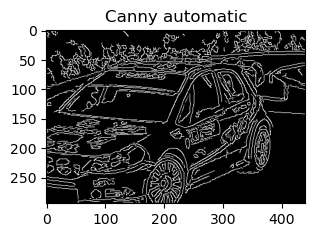

In [13]:
from lib.imageutil import show_image, median_canny

median_canny = median_canny(image)
show_image(median_canny, 'Canny automatic')